# Workshop 3

Sådan fungerer workshops:<br> I løser opgaverne i jeres studiegruppen. For hver opgave starter I med at diskutere svaret på opgaven i gruppen. Gruppediskussionen øger jeres forståelse af begreberne samt gør at i bedre kan huske dem. Det er vigtigt at I snakker om eksempler, så I får forståelse for den praktiske anvendelse af det teoretiske begreb. Når I har diskuteret i gruppen, skriver i hver især svaret på opgaven ned med jeres egne ord, dette er god træning til eksamen, som er skriftlig og individuel. Workshopinstruktørerne er til stede, så ræk hånden op hvis I har problemer med en opgave. De opgaver i ikke når at løse på workshoppen er hjemmeopgaver til næste gang. Hver workshop starter med at løsningen på opgaverne fra sidste gang gennemgås af jeres instruktører.

## 📚 Om denne workshop: Hvorfor regne manuelt når Python kan gøre det?

I denne workshop vil I se mange beregninger hvor vi bruger `sum()`, `len()`, og manuel sortering til at beregne ting som gennemsnit, median, og modus. Det kan virke som unødvendigt arbejde når Python har færdige funktioner til dette.

### Hvorfor gør vi det sådan?

**1. Forståelse under overfladen**  
Når I forstår *hvordan* et gennemsnit beregnes (sum divideret med antal), får I:
- Bedre intuition for hvad tallet betyder
- Evnen til at spotte fejl i data eller beregninger
- Forståelse for hvornår forskellige mål er passende

**2. Datastrukturer er nøglen**  
For at bruge Pythons kraftfulde værktøjer effektivt, skal I forstå:
- Hvornår data er en **liste** vs. en **pandas DataFrame**
- Hvilke metoder der virker på hvilke datastrukturer
- Hvordan man konverterer mellem forskellige formater

**3. Fundamentet for videre læring**  
De manuelle beregninger lærer jer:
- Basis Python syntaks (loops, funktioner, indexing)
- Logisk tænkning og problemløsning
- Hvordan statistiske formler rent faktisk fungerer

### Hvad er alternativerne?

I praksis vil I bruge specialiserede pakker:
```python
# For lister: statistics modulet
import statistics
statistics.mean(my_list)
statistics.median(my_list)
statistics.mode(my_list)

# For DataFrames: pandas indbyggede metoder
import pandas as pd
df['column'].mean()
df['column'].median()
df['column'].mode()

# For numerisk analyse: numpy
import numpy as np
np.mean(my_array)
np.median(my_array)
```

#### **Denne workshop**: Lær hvordan tingene virker  
**I praksis**: Brug de bedste værktøjer til jobbet  
**Jeres mål**: Forstå både "hvorfor" og "hvordan", så I kan vælge det rigtige værktøj til enhver situation

---

## Kapitel 4

### 4.1



Sidste år blev antallet af sygedage grundet forkølelse og influenza registreret i en stikprøve på 15 voksne mennesker. Dataene er: <br>

5, 7, 0, 3, 15, 6, 5, 9, 3, 8, 10, 5, 2, 0, 12 <br>


Beregn gennemsnit, median og modus. Forklar resultaterne.

#### Løsning

Først kan vi definere vores data som en liste:

In [28]:
data = [5, 7, 0, 3, 15, 6, 5, 9, 3, 8, 10, 5, 2, 0, 12]
data

[5, 7, 0, 3, 15, 6, 5, 9, 3, 8, 10, 5, 2, 0, 12]

##### Lad os starte med gennemsnit.

<br>

$$
\mu = \frac{\sum_{i=1} X_i}{N}
$$
<br>
Mere simpelt:
<br>
$$
Gennemsnit = \frac{Total sum}{Number_{Observations}}
$$

<br>

Vi kan gøre brug af nogle indbyggede metoder i python til at gøre udregningen gennemskuelig. <br> <br>

sum(X), som navnet antyder, finder den totale sum af din datakilde. I dette tilfælde kan vi blot indtaste listens navn, men funktionen kan også bruges på kolonner i en dataframe. I så fald er koden sum(dataframe[kolonne_navn]) <br><br>

len(x) kan bruges til at finde antallet af datapunkter (N), hvilket svarer til længden af eksempelvis en liste eller antallet af rækker i en kolonne. Bruges på samme måde som sum(x).

In [29]:
sum(data)

90

In [30]:
len(data)

15

In [31]:
# Gennemsnit = Den totale sum af data, divideret med antallet af data punkter
gennemsnit = sum(data) / len(data)
gennemsnit

6.0

In [32]:
# Med statistics pakken:
import statistics

statistics.mean(data)

6

In [33]:
import numpy as np
np.mean(data)

np.float64(6.0)

#####  Derefter finder vi medianen.


Eftersom vores data er i et liste format skal vi først sortere dataen efter størrelse, så det bliver lidt mere gennemskueligt:

In [34]:
data.sort() # sort() har en række muligheder for sortering, som kan findes via en google search
data

[0, 0, 2, 3, 3, 5, 5, 5, 6, 7, 8, 9, 10, 12, 15]

Når der er et lige antal observationer, skal vi lægge de 2 midterste værdier sammen, og dividere med 2 (gennemsnit) for at finde en passende median. <br>
Vores data har et ulige antal da; len(data) = 15. Dette betyder at vi nemt kan finde medianen visuelt, ved blot at udpege den 8. værdi i den sorterede liste (I dette tilfælde 5)

In [35]:
data[7] #Husk at Python index starter ved 0, så for at få den 8. værdi, skal vi bruge index 7

5

I Python kan vi dog finde medianen på en smartere måde, ved at gøre brug af %-operatøren. <br>
For at finde ud af om et tal er lige, eller ulige kan vi blot se om 'resten' af en division (i hele tal) er lig 1. <br>

In [36]:
op_example_equal = 9 % 3
op_example_unequal = 10 % 3

print(f'Uden rest 9 / 3 : {op_example_equal}')
print(f'Med 1 i rest 10 / 3 : {op_example_unequal}')


Uden rest 9 / 3 : 0
Med 1 i rest 10 / 3 : 1


Hvis implementere denne logik med if-else statements kan vi lave følgende:

In [37]:
# Først beregnes længden af datasættet og gemmes i variablen 'n'.
n = len(data)
# Dernæst tjekkes der, om antallet af elementer i datasættet 'n' er ulige.
if n % 2 == 1:
    # Hvis 'n' er ulige, er medianen det midterste element i datasættet.
    # Da lister er 0-indekserede, bruges 'n//2' til direkte at finde indekset for det midterste element.
    median = data[n//2]
else:
    # Hvis 'n' er lige, er der ikke noget enkelt midterste element,
    # så medianen er gennemsnittet af de to midterste elementer.
    # De to midterste elementer findes ved 'n//2 - 1' (det første midterste element) og 'n//2' (det andet midterste element).
    # Disse to værdier summeres og divideres med 2 for at finde deres gennemsnit, hvilket er medianen.
    median2 = (data[n//2 - 1] + data[n//2]) / 2

In [38]:
median

5

In [39]:
# Med statistics pakken:
statistics.median(data)

5

##### Til sidst finder vi modus



Dette kan gøres enten på et par forskellige måder, og det er mere personlig præference end noget andet (som ofte er tilfældet i Python) <br>

En lidt besværlig måde for begyndere:

In [40]:
# Finder modus
frekvens = {}
for nummer in data:
    frekvens[nummer] = frekvens.get(nummer, 0) + 1
modus = max(frekvens, key=frekvens.get)
modus

5

Mere ligetil ved at gøre brug af pandas biblioteket:

In [41]:
# Importer pandas
import pandas as pd
# Konverter listen af data til en Pandas series
data_series = pd.Series(data)
# Brug value_counts() metoden til at tælle alle værdier i datasættet
value_counts = data_series.value_counts()
# There you go, nu kan vi blot vise resultatet
print(value_counts)
# Så der er tre observationer af værdien 5, hvilket er den mest hyppige
# Hvis du vil tilgå/printe værdien direkte, kan du igen gøre brug af index
print(f'\n Modus: {value_counts.index[0]}')

5     3
0     2
3     2
2     1
6     1
7     1
8     1
9     1
10    1
12    1
15    1
Name: count, dtype: int64

 Modus: 5


In [42]:
# Med statistics pakken:
statistics.mode(data)

5

### 4.3


Professorerne på Wilfrid Laurier Universitet skal indsende deres afsluttende eksamener til sekretæren senest 10 dage inden semestret slutter. Eksamenskoordinatoren tog en stikprøve på 20 professorer og registrerede antallet af dage inden den afsluttende eksamen, hvor professorerne indsendte deres eksamener. Resultaterne er: <br>

14, 8, 3, 2, 6, 4, 9, 13, 10, 12, 7, 4, 9, 13, 15, 8, 11, 12, 4, 0 <br>

Beregn gennemsnit, median og modus. Forklar resultaterne.

#### Løsning

Vi gentager skridtene fra tidligere opgave:

In [43]:
data4_3 = [14, 8, 3, 2, 6, 4, 9, 13, 10, 12, 7, 4, 9, 13, 15, 8, 11, 12, 4, 0]
# Sorteringen har stadig indflydelse på indeks/udregning af median, så dette skridt skal udføres
data4_3.sort()

In [44]:
#Gennemsnit
gennemsnit = sum(data4_3)/len(data4_3)

#Median
n = len(data4_3)
if n % 2 == 1:
    median = data4_3[n//2]
else:
    median = (data4_3[n//2 - 1] + data4_3[n//2]) / 2

#Modus
data_series4_3 = pd.Series(data4_3)
value_counts = data_series4_3.value_counts()

#Print resultater

print(f'Gennemsnit: {gennemsnit}')
print(f'Median: {median}')
print(f'Modus: {value_counts.index[0]}')

Gennemsnit: 8.2
Median: 8.5
Modus: 4


### 4.6

 Return on investment (ROI) viste sig over en 5-årig periode  <br>
 År    1,    2,    3,    4,  5 <br>
 Afkastningsgrad 0.10, 0.22, 0.06, -0.05, 0.2 <br>

 a) Beregn gennemsnit og median på afkast. Forklar resultatet. <br>b) Beregn geometrisk gennemsnit <br> c) Hvilken af de tre statistikker beregnet i a) og b) beskriver bedst afkast over en 5-årig periode? Uddyb dit svar.

#### Løsning

Det er ofte nemmere at arbejde i dataframes, så lad os konvertere vores data dertil:

In [45]:
# Definerer data som et dictionary
data4_6 = {
    'År': [1, 2, 3, 4, 5],
    'Afkastningsgrad': [0.10, 0.22, 0.06, -0.05, 0.2]
}

# Opretter en DataFrame ud fra dictionary
df4_6 = pd.DataFrame(data4_6)
df4_6

,År,Afkastningsgrad
0,1,0.10
1,2,0.22
2,3,0.06
3,4,-0.05
4,5,0.20


##### a) Beregn gennemsnit og median på afkast. Forklar resultatet.



For at finde gennemsnit kan vi istedet for at lave en masse mellemregninger, blot gøre brug af .mean() metoden.

In [46]:
df4_6['Afkastningsgrad'].mean()

np.float64(0.10600000000000001)

For at finde medianen af afkastningsgraden, kan vi blot konvertere den specifikke kolonne til en liste, og bruge samme metode som før:

In [47]:
# Konvertere Afkastningsgrad til en liste
liste4_6 = list(df4_6['Afkastningsgrad'])
# Sortere listen baseret på værdi
liste4_6.sort()

Og nu kan vi gentage processen fra tidligere opgave:

In [48]:
n = len(liste4_6)
if n % 2 == 1:
    median = liste4_6[n//2]
else:
    median = (liste4_6[n//2 - 1] + liste4_6[n//2]) / 2

In [49]:
median

0.1

##### b) Beregn geometrisk gennemsnit

Dette script anvender numpy-biblioteket for at forenkle beregningen. <br>


```
np.prod(1 + afkast)**(1/n) - 1
```

Dette beregner produktet af 1 + hver afkastningsgrad1 + hver afkastningsgrad,<br> **(1/len(afkast)) tager den n'te rod af dette produkt (hvor n er antallet af afkastningsgrader), som svarer til at beregne det geometriske gennemsnit. Til sidst trækkes 1 fra for at justere for den oprindelige addition af 1.

In [50]:
import numpy as np

# Definerer afkastningsgrader
afkast = np.array(df4_6['Afkastningsgrad'])
n = len(afkast)

# Beregner det geometriske gennemsnit ved at tage produktet af (1 + afkast) og derefter anvende den n'te rod, hvor n er antallet af elementer
geometrisk_gennemsnit = np.prod(1 + afkast)**(1/n) - 1

print(f'Geometrisk gennemsnit: {geometrisk_gennemsnit}')


Geometrisk gennemsnit: 0.10152065833683643


##### c) Hvilken af de tre statistikker beregnet i a) og b) beskriver bedst afkast over en 5-årig periode? Uddyb dit svar.

**Svar:** Geometrisk gennemsnit

Simpel forklaring: <br>

**Tager højde for sammensætning:** Det geometriske gennemsnit medregner, hvordan afkast akkumuleres over tid, inklusiv effekten af at geninvestere afkast. Dette giver et mere nøjagtigt billede af den faktiske vækst i en investering, fordi det viser, hvordan afkast påvirker hinanden over tid, i modsætning til det almindelige gennemsnit, som behandler hvert års afkast isoleret.

**Håndterer volatilitet bedre:** I perioder med høj volatilitet, inklusive negative afkast, giver det geometriske gennemsnit en mere realistisk vurdering af den overordnede præstation. For eksempel, hvis du mister 50% et år og tjener 50% næste år, vil du ikke være tilbage ved startpunktet, hvilket det geometriske gennemsnit korrekt afspejler, mens det aritmetiske gennemsnit kan foreslå, at du i gennemsnit har brudt lige.

Mere avanceret:

**Sammensætningseffekter:** Det geometriske gennemsnit tager højde for effekten af sammensætning over tid. I finansiel sammenhæng betyder sammensætning, at afkast ikke kun genereres på det oprindelige beløb, men også på de afkast, der geninvesteres over tid. Det aritmetiske gennemsnit ignorerer denne effekt, hvilket kan føre til en overvurdering af de faktiske afkast, hvis der indgår perioder med betydelige svingninger i afkastet.

**Negative Afkast:** Det geometriske gennemsnit kan håndtere perioder med negative afkast på en måde, der bedre afspejler den faktiske indvirkning på den samlede porteføljeværdi over tid. Det aritmetiske gennemsnit kan give en misledende indikation af positiv vækst, selv hvis en stor negativ afkastperiode har udhulet en betydelig del af porteføljeværdien.

**Langtidsperspektiv:** Det geometriske gennemsnit giver et mere nøjagtigt mål for gennemsnitlige afkast over lange perioder, hvor effekten af sammensætning er mest markant. Det er derfor en bedre indikator for forventet langsigtsperformance og hjælper investorer med at sætte realistiske forventninger til afkast af deres investeringer over tid.

**Fair Sammenligning:** Når man sammenligner investeringsperformance over tid eller mellem forskellige investeringsmuligheder, giver det geometriske gennemsnit en mere retfærdig sammenligningsgrund, fordi det tager højde for volatiliteten i afkastene og deres indbyrdes påvirkning.

### 4.12

Mængden af tid, som indbyggere i Paris, bruger på pendling, blev registreret i en stikprøve på 235 pendlere. Beregn gennemsnit og median i datasæt Xr04-12 i python (se eksempel 4.10). Forklar resultaterne.

#### Løsning

In [51]:
data = pd.read_excel('https://raw.githubusercontent.com/louisehviid/km2023/main/data/Chapter4/Xr04-12.xlsx')

In [52]:
data

,Commute time
0,56
1,42
2,44
3,36
4,35
...,...
230,41
231,41
232,55
233,50


In [53]:
mean_value = data['Commute time'].mean()
print(mean_value)

45.60425531914893


In [54]:
median_value = data['Commute time'].median()
print(median_value)

45.0


At gennemsnittet ligger så tæt på medianen, fortæller os at værdi-fordelingen af Commute time højst sandsynligt er nogenlunde ligeligt fordelt omkring middelværdien. Hvis vi visualisere det i et histogram, vil vi også se en nogenlunde naturlig fordeling (bellcurve). Dog ser vi også at der en en vis udligning imellem høje/lave værdier. <br>

Havde gennemsnittet være betydeligt højere end medianen, kan det enten være en indikator på en skævfordeling mod de højere værdier i reelle antal af observationer, eller fordi at enkelte værdier er så høje at de blot øger gennemsnitsværdien på en misvisende måde (outliers/udstikkere).<br>

Det er dog også vigtigt at pointere, at det også kunne være tilfældet at vi blot har ekstreme værdier på begge sider af skalaen som udligner hinanden til at give en gennemsnitsværdi der ligger tæt på medianen.<br>

Det korte af det lange er: Undersøg altid den reelle fordeling nærmere, for at kunne uddybe forholdet gennemsnit og median.

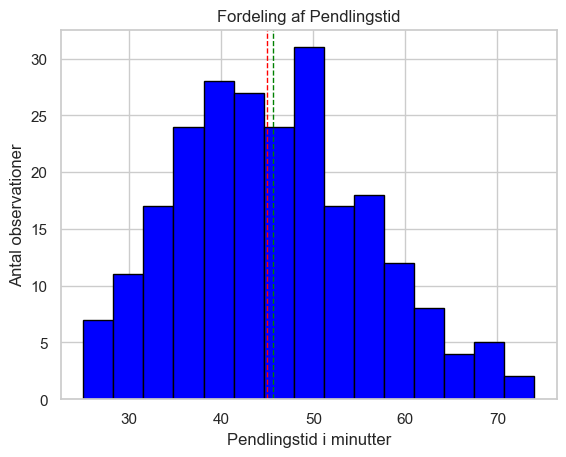

In [55]:
import matplotlib.pyplot as plt

# Plotter et histogram
plt.hist(data['Commute time'], bins=15, color='blue', edgecolor='black')

# Tilføjer en RØD linje for medianen
plt.axvline(median_value, color='red', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')

# Tilføjer en GRØN linje for gennemsnittet
plt.axvline(mean_value, color='green', linestyle='dashed', linewidth=1, label=f'Gennemsnit: {mean_value:.2f}')

# Tilføjer titler og labels
plt.title('Fordeling af Pendlingstid')
plt.xlabel('Pendlingstid i minutter')
plt.ylabel('Antal observationer')

# Viser plottet
plt.show()

### 4.26

Beregn varians og standardafvigelse i den følgende stikprøve og forklar resultatet: <br>

12, 6, 22, 21, 23, 13, 15, 17, 21

#### Løsning

In [56]:
# Definerer stikprøven
data = [12, 6, 22, 21, 23, 13, 15, 17, 21]

In [57]:
# Beregner gennemsnittet
mean = sum(data) / len(data)

In [58]:
# Beregner summen af kvadrerede afvigelser fra gennemsnittet
# Vi starter med at lave en variabel og sætte den til nul.
# Vi bruger denne til at holde styr på den totale sum
sum_kvadreret_afvigelse = 0
# Here kører vi et for-loop. Vi kører altså de efterfølgende operationer for hver værdi (x) i data-listen
for x in data:
    # Først finder vi afvigelsen for hvert datapunkt fra gennemsnittet
    afvigelse = x - mean
    # Kvadrerer afvigelsen
    kvadreret_afvigelse = afvigelse ** 2
    # Lægger den kvadrerede afvigelse til den variabel vi lavede til at starte med
    sum_kvadreret_afvigelse += kvadreret_afvigelse

In [59]:
# Beregner variansen
varians = sum_kvadreret_afvigelse / (len(data) - 1)

In [60]:
# Beregner standardafvigelsen
standardafvigelse = varians ** 0.5

In [61]:
# Udskriver resultaterne
print(f"Varians: {varians}")
print(f"Standardafvigelse: {standardafvigelse}")

Varians: 32.25
Standardafvigelse: 5.678908345800274


In [62]:
# Løsning med statistics modulet
import statistics

varians = statistics.variance(data)
standardafvigelse = statistics.stdev(data)

print(f"Varians: {varians}")
print(f"Standardafvigelse: {standardafvigelse}")

Varians: 32.25
Standardafvigelse: 5.678908345800274


In [63]:
# Alternativ Løsning: Omform Liste til DataFrame og brug Pandas indbyggede funktioner:
import pandas as pd
df = pd.DataFrame({'values': data})
varians = df['values'].var()  # Uses sample variance by default
standardafvigelse = df['values'].std()

print(varians)
print(standardafvigelse)

32.25
5.678908345800274


### 4.54

Bestem 1., 2.og 3. kvartil i følgende data og tegn et boksplot. Forklar resultaterne: <br>
2, 4, 6, 8, 10, 12, 14, 16, 18, 20

#### Løsning

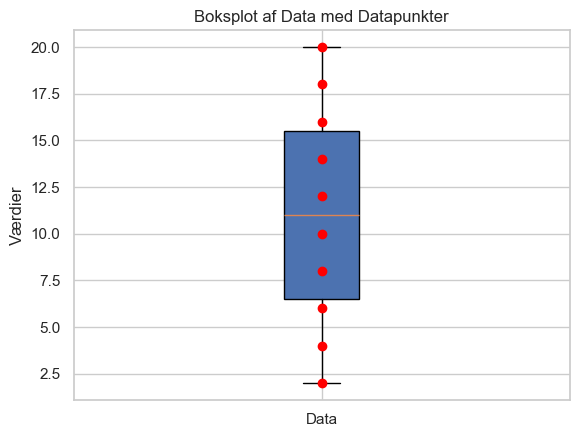

(np.float64(6.5), np.float64(11.0), np.float64(15.5))

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Definerer data
data = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

# Beregner kvartiler
Q1 = np.percentile(data, 25)  # 1. kvartil (25%)
Q2 = np.percentile(data, 50)  # 2. kvartil (mediane) (50%)
Q3 = np.percentile(data, 75)  # 3. kvartil (75%)

# Tegner et boksplot med hvert datapunkt
plt.boxplot(data, showfliers=True, patch_artist=True)  # Viser outliers og bruger farvefyld
plt.scatter([1]*len(data), data, color='red', zorder=3)  # Plotter hvert datapunkt som en rød prik

plt.title('Boksplot af Data med Datapunkter')
plt.xticks([1], ['Data'])
plt.ylabel('Værdier')

# Viser boksplottet med datapunkter
plt.show()


Q1, Q2, Q3


1. kvartil (Q1): 6.5, hvilket betyder, at 25% af dataene ligger under denne værdi.
2. kvartil (Q2) / Median: 11.0, hvilket indikerer det midterste punkt i datasættet, således at halvdelen af dataene er under denne værdi og den anden halvdel er over.
3. kvartil (Q3): 15.5, hvilket betyder, at 75% af dataene er under denne værdi, mens de resterende 25% ligger over.
Boksplottet visualiserer fordelingen af disse data og viser tydeligt kvartilernes placering samt den overordnede spredning. I et boksplot:

Boksen strækker sig fra Q1 til Q3 og repræsenterer det interkvartile område (IQR), hvor halvdelen af dataene findes.
Medianen (Q2) er markeret med en linje inden i boksen.
"Whiskers" (antennelignende linjer) udgår fra boksen til de laveste og højeste punkter inden for 1.5 gange IQR fra Q1 og Q3, hvilket giver en visuel repræsentation af dataenes spredning.
Punkter uden for whiskers kan betragtes som outliers, men i dette tilfælde har vi ingen outliers, da alle punkter ligger inden for det forventede område.
Resultaterne og boksplottet illustrerer en jævn og symmetrisk fordeling af dataene fra 2 til 20, uden outliers, og med en ligelig fordeling omkring medianen. Dette indikerer en uniform stigning i værdierne uden store spring eller ujævnheder i datasættet.

### 4.71

Mængden af tid, som gæster bruger over en kop kaffe eller en dessert, påvirker mange restauranters profit negativt. For at lære mere om den variabel, blev en stikprøve på 200 grupper af restaurantgæster observeret, og mængden af tid, de brugte i restauranten, blev registreret. Brug datasæt Xr04-71 i Python (se eksempel 4.67): <br>

**a) Bestem kvartilerne i datasættet** <br>
**b) Hvad kan du udlede om mængden af tid, der bruges i restauranten?** <br>

#### Løsning

In [65]:
data= pd.read_excel('https://raw.githubusercontent.com/aaubs/AnvendtStatistik2026/main/Data/Xr04-71.xlsx')

In [66]:
data.head(5)

,Times
0,25
1,28
2,29
3,23
4,32


In [67]:
Q1 = data['Times'].quantile(0.25)
Q2 = data['Times'].quantile(0.50)  # Dette er også medianen
Q3 = data['Times'].quantile(0.75)

print("1. kvartil (Q1):", Q1)
print("2. kvartil (Q2):", Q2)
print("3. kvartil (Q3):", Q3)

1. kvartil (Q1): 26.0
2. kvartil (Q2): 28.5
3. kvartil (Q3): 32.0


**Analyse og Implikationer:**

***Bred Variation i Tidsforbrug:*** Disse kvartilværdier viser en betydelig spredning i tidsforbruget blandt gæster. Der er en stor forskel mellem Q1 og Q3, hvilket indikerer, at mens nogle gæster forlader restauranten relativt hurtigt (inden for 50 minutter), er der en betydelig andel af gæster, der bliver betydeligt længere (op til 260 minutter eller mere).

***Langt Ophold for Nogle Gæster:*** Medianen (Q2) på 125 minutter tyder på, at halvdelen af gæsterne bruger mere end to timer i restauranten. Dette er en betydelig mængde tid, som potentielt kan påvirke restaurantens evne til at omsætte borde, særligt i travle perioder.

**Strategiske Overvejelser:**

***Forbedring af Bordomsætning:*** Restauranten kan overveje strategier for at forbedre bordomsætningen, specielt for gæster, der har tendens til at blive længere end medianen. Dette kan inkludere at indføre tidsbegrænsninger for borde under spidsbelastning eller tilbyde incitamenter for gæster til at forlade bordet hurtigere.

***Tilpasning af Service:*** For gæster, der bruger lang tid i restauranten, kan der være muligheder for at øge salget, f.eks. ved at tilbyde yderligere drikkevarer, desserter eller specialmenuer for at forbedre gæstens oplevelse og samtidigt øge restaurantens indtjening.

***Kapacitetsplanlægning:*** Den store variation i tidsforbrug understreger behovet for nøje kapacitetsplanlægning. Restauranten skal måske overveje fleksible seating-arrangementer eller justeringer i personalets arbejdsplaner for at imødekomme både korte og lange ophold.

### 4.81

Referér til opgave 4.80 i bogen. Du ved nu, at de to standardafvigelser er 16 og 12. <br>  
a) Beregn korrelationskoefficienten (r). Hvad kan du udlede af denne statistik omkring sammenhængen mellem de to variabler? <br>
b) Beregn determinantkoefficienten (r2) og beskriv, hvad den viser om sammenhængen mellem de to variabler.

#### Løsning

In [68]:
# Givne værdier
cov_XY = -150
s_X = 16
s_Y = 12

# Beregning af korrelationskoefficienten
r = cov_XY / (s_X * s_Y)

r

-0.78125

Der er en moderat negativ lineær sammenhæng

In [69]:
# Beregning af determinantkoefficienten
r_squared = r ** 2

r_squared

0.6103515625

61.04% of the variation in y is explained by the variation in x

**a) Analyse af Korrelationskoefficienten (r)**
Korrelationskoefficienten på -0.78125 indikerer en stærk negativ lineær sammenhæng mellem de to variabler. Det betyder, at når værdien af den ene variabel stiger, tenderer værdien af den anden variabel til at falde, og vice versa. Størrelsen af korrelationskoefficienten (absolut værdi tæt på 1) viser, at sammenhængen er relativ stærk.

**b) Analyse af Determinantkoefficienten (r²)**
Determinantkoefficienten på 0.6103515625 (eller 61.03%) indikerer, at ca. 61% af variationen i den ene variabel kan forklares af variationen i den anden variabel. Dette viser et signifikant niveau af fælles variation mellem de to variabler, hvilket understøtter den stærke sammenhæng indikeret af korrelationskoefficienten.

**Samlet set** indikerer disse statistikker, at der er en stærk og negativ lineær relation mellem de to undersøgte variabler, og en betydelig del af variationen i den ene variabel kan forklares gennem dens relation til den anden variabel.

### 4.83

Er den givne karakter i et fag relateret til mængden af tid, der er brugt på at studere? For at undersøge denne sandsynlighed tog en studerende en tilfældig stikprøve på 10 studerende, der havde ’Accounting’ på sidste semester. Den studerende bad dem hver især om at rapportere sin karakter i faget samt den totale mængde af timer, der er blevet brugt på at studere faget. Data findes i datasæt Xr04-83. Beregn følgende i Python (se eksempel 4.82):  <br> <br>
a) Beregn kovarians <br> <br>
b) Beregn korrelationskoefficienten (r) <br> <br>
c) Beregn determinantkoefficienten (r2) <br> <br>
d) Anvend ’Mindste kvadraters metode’ til at lave en tendenslinje (’the least squares line’) <br> <br>
e) Hvad fortæller de udregnede statistikker om relationen mellem karakter og studietid?

#### Løsning

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [71]:
data = pd.read_excel('https://raw.githubusercontent.com/aaubs/AnvendtStatistik2026/main/Data/Xr04-83.xlsx')
data.head()

,Study time,Marks
0,40,77
1,42,63
2,37,79
3,47,86
4,25,51


In [72]:
# a) Beregn kovarians
cov_matrix = np.cov(data['Study time'], data['Marks'])
covariance = cov_matrix[0, 1]
print(covariance)

98.52222222222223


In [73]:
# b) Beregn korrelationskoefficienten (r)
correlation_coefficient = np.corrcoef(data['Study time'], data['Marks'])[0, 1]
print(correlation_coefficient)

0.8811735631258527


In [74]:
# c) Beregn determinantkoefficienten (r2)
determinant_coefficient = correlation_coefficient ** 2
print(determinant_coefficient)

0.7764668483519112


In [75]:
#from scipy import stats
# Vi skal bruge den pakke til at udregne lineær regression
from scipy import stats

In [76]:
# d) Anvend 'Mindste kvadraters metode' til at lave en tendenslinje
slope, intercept, r_value, p_value, std_err = stats.linregress(data['Study time'], data['Marks'])
tendenslinje = lambda x: slope * x + intercept

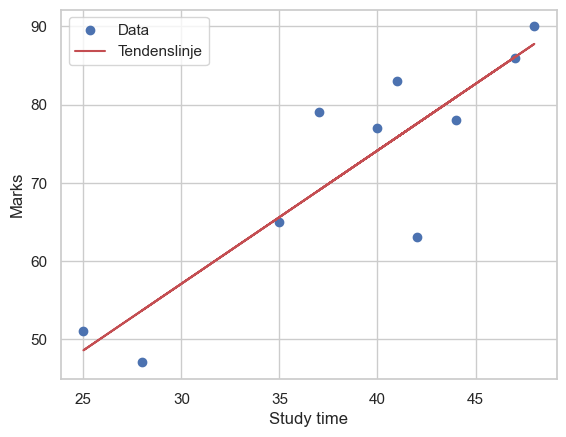

In [77]:
# Plotter data og tendenslinjen
plt.scatter(data['Study time'], data['Marks'], label='Data')
plt.plot(data['Study time'], tendenslinje(data['Study time']), 'r-', label='Tendenslinje')
plt.xlabel('Study time')
plt.ylabel('Marks')
plt.legend()
plt.show()

In [78]:
print(f'Kovariansen: {covariance}')
print(f'Korrelationskoefficienten (r): {correlation_coefficient}')
print(f'Determinantkoefficienten (r²): {determinant_coefficient}')
print(f'Hældning: {slope}')
print(f'Skæringspunkt: {intercept}')

Kovariansen: 98.52222222222223
Korrelationskoefficienten (r): 0.8811735631258527
Determinantkoefficienten (r²): 0.7764668483519112
Hældning: 1.7048644491443954
Skæringspunkt: 5.921745818111901


**Kovariansen** giver os en idé om, hvordan de to variabler ændrer sig sammen. En positiv værdi indikerer, at højere studietid generelt er forbundet med højere karakterer, og omvendt. <br>

**Korrelationskoefficienten (r)** måler styrken og retningen af den lineære sammenhæng mellem studietid og karakterer. En værdi tæt på 1 eller -1 indikerer en stærk lineær sammenhæng, mens en værdi tæt på 0 indikerer en svag sammenhæng.<br>

**Determinantkoefficienten (r²)** fortæller os, hvor stor en del af variationen i karakterer, der kan forklares af deres lineære forhold til studietiden. Jo højere værdi, desto bedre er modellen til at forklare variationen i karakterer baseret på studietid.<br>

**Mindste kvadraters metode** giver os en tendenslinje, der bedst passer til dataene. Hældningen (slope) af denne linje indikerer forholdet mellem studietid og karakter, og skæringen (intercept) indikerer den forventede karakter, når studietiden er 0.<br>

De beregnede statistikker vil give indsigt i, hvorvidt der er en signifikant sammenhæng mellem mængden af studietid og de opnåede karakterer for studerende, der har taget 'Accounting'.

### 4.130

Referér til opgave 3.54 (se Python-eksempel fra workshop 2). Brug datasæt Xr03-54 til at beregne følgende i Python: <br>  
a) Beregn tendenslinjens koefficienter (find a og b → y = ax + b)  <br>
 b) Beregn determinantkoefficienten (r2)

#### Løsning

In [79]:
data = pd.read_excel('https://raw.githubusercontent.com/aaubs/AnvendtStatistik2026/main/Data/Xr03-54.xlsx')

In [80]:
data.columns

Index(['Speed', 'Cost'], dtype='str')

In [81]:
# a) Beregn tendenslinjens koefficienter (a og b)
slope, intercept, r_value, p_value, std_err = stats.linregress(data['Speed'], data['Cost'])

# b) Beregn determinantkoefficienten (r2)
determinant_coefficient = r_value ** 2

# Udskriv de beregnede værdier
slope, intercept, determinant_coefficient

(np.float64(77.68686868686869),
 np.float64(-369.9333333333335),
 np.float64(0.9334032570102272))

**Fortolkning:**

**Tendenslinjens koefficienter:** Hældningen på ca. 77.69 angiver, at for hver ekstra enhed af 'Speed', øges 'Cost' med ca. 77.69 enheder. Skæringen med y-aksen på ca. -369.93 viser det forventede 'Cost', når 'Speed' er 0.

**Determinantkoefficienten (r²)** på ca. 0.933 fortæller os, at ca. 93.34% af variationen i 'Cost' kan forklares af den lineære sammenhæng med 'Speed'. Dette er et meget højt forklaringsniveau, som indikerer, at 'Speed' er en stærk prædiktor for 'Cost'.

**Disse resultater** indikerer en stærk, positiv lineær relation mellem 'Speed' og 'Cost'. Med en høj determinantkoefficient viser det, at en betydelig del af variationen i omkostningerne kan forklares ved ændringer i hastigheden. Dette betyder praktisk, at som hastigheden øges, gør omkostningerne det også, hvilket kunne antyde, at højere hastigheder medfører højere omkostninger, muligvis på grund af øgede brændstofomkostninger, slid, eller andre faktorer, der bidrager til den samlede 'Cost'.

## Ekstra opgave  4.68

Karriererådgivningscenteret på universitetet ønskede at vide mere om startlønnen blandt dimittender fra universitetet. De bad hver dimittend om at rapportere det højeste løntilbud, de havde modtaget. <br>
I spørgeskemaet skulle dimittenderne også rapportere deres uddannelsesgrad samt startløn (kolonne A = BA (Bachelor of Arts), kolonne B = BSc (Bachelor of Science), kolonne C = BBA (Bachelor of Business Administration), kolonne D = andet). I datasæt Xr04-68 beregn kvartilerne for hver uddannelsesgrad og forklar, hvad de viser om de fire grupper af dimittender.

### Løsning

In [82]:
data = pd.read_excel('https://raw.githubusercontent.com/aaubs/AnvendtStatistik2026/main/Data/Xr04-68.xlsx')

In [83]:
data.columns

Index(['BA', 'BSc', 'BBA', 'Other'], dtype='str')

In [84]:
# Beregning af kvartiler for hver uddannelsesgrad
kvartiler = {}
for grad in ['BA', 'BSc', 'BBA', 'Other']:
    kvartiler[grad] = {
        'Q1': data[grad].quantile(0.25),
        'Q2': data[grad].quantile(0.50),  # Dette er også medianen
        'Q3': data[grad].quantile(0.75)
    }

print(kvartiler)

{'BA': {'Q1': np.float64(25757.0), 'Q2': np.float64(27765.0), 'Q3': np.float64(29818.0)}, 'BSc': {'Q1': np.float64(30069.0), 'Q2': np.float64(33396.5), 'Q3': np.float64(36649.75)}, 'BBA': {'Q1': np.float64(31318.0), 'Q2': np.float64(34284.0), 'Q3': np.float64(39374.0)}, 'Other': {'Q1': np.float64(28265.0), 'Q2': np.float64(29950.5), 'Q3': np.float64(32594.75)}}


BA (Bachelor of Arts)
1. kvartil (Q1): 25,757
Median (Q2): 27,765
3. kvartil (Q3): 29,818
For BA-dimittender starter startlønnen for de nederste 25% under 25,757, medianlønnen er 27,765, og de øverste 25% har en startløn over 29,818.

BSc (Bachelor of Science)
1. kvartil (Q1): 30,069
Median (Q2): 33,396.5
3. kvartil (Q3): 36,649.75
BSc-dimittender har generelt højere startløn sammenlignet med BA, med medianlønnen omkring 33,396.5, hvilket indikerer et højere lønniveau.

BBA (Bachelor of Business Administration)
1. kvartil (Q1): 31,318
Median (Q2): 34,284
3. kvartil (Q3): 39,374
BBA-dimittender viser den højeste startløn blandt de undersøgte grupper, med en median på 34,284 og betydeligt højere løn i 3. kvartil.

Andet
1. kvartil (Q1): 28,265
Median (Q2): 29,950.5
3. kvartil (Q3): 32,594.75
Dimittender med andre uddannelser har startlønninger, der ligger mellem BA og BSc/BBA grupperne, med en medianløn tættere på BA-dimittenderne.

Analyse og Konklusion
Lønniveau: BBA-dimittender har den højeste startløn, efterfulgt af BSc, "Andet", og til sidst BA. Dette kan indikere, at visse fagområder er mere lukrative end andre lige efter endt uddannelse.
Lønspredning: Spredningen af startløn (forskellen mellem Q1 og Q3) er størst for BBA, hvilket antyder større variation i løntilbud inden for denne gruppe. BSc og "Andet" følger herefter, mens BA viser den mindste spredning.

Lad os visualisere fordelingerne som boksplots sat op ved siden af hinanden:

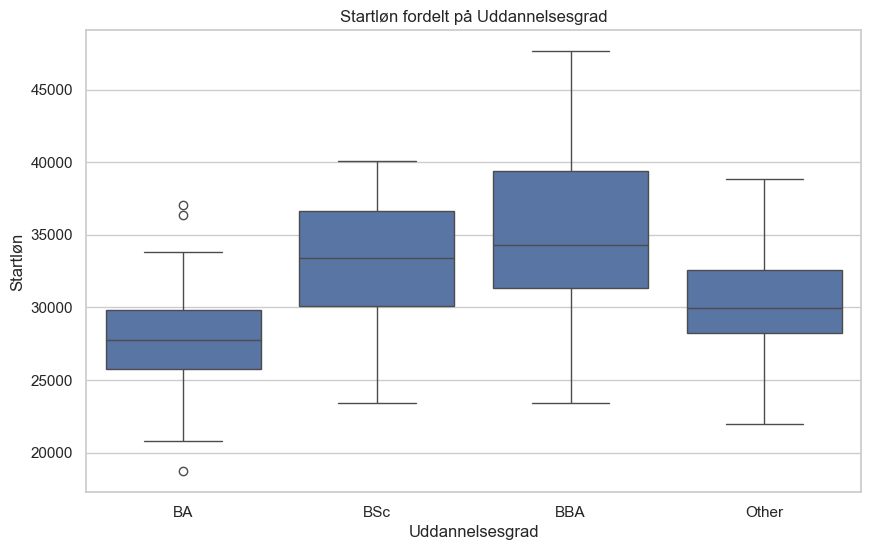

In [85]:
# Konverterer data til "long" format for lettere plotting med seaborn
long_data = data.melt(var_name='Degree', value_name='Starting Salary')

# Importerer seaborn for et mere avanceret plot
import seaborn as sns

# Sætter plotstil
sns.set(style="whitegrid")

# Tegner boksplot
plt.figure(figsize=(10, 6))
boksplot = sns.boxplot(x='Degree', y='Starting Salary', data=long_data)

# Sætter titel og labels
boksplot.set_title('Startløn fordelt på Uddannelsesgrad')
boksplot.set_xlabel('Uddannelsesgrad')
boksplot.set_ylabel('Startløn')

# Viser plottet
plt.show()